In [1]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
query_y = torch.load('data/pt-cache/query_pred_adv.pt').long()
target_y = torch.load('data/pt-cache/target_pred.pt').long()

In [4]:
train_x, test_x, train_y, test_y = train_test_split(query_y.view(-1,64), target_y.view(-1,64), test_size=1000)
train_X = F.one_hot(train_x, num_classes=9).float().view(-1,576)
# train_Y = F.one_hot(train_y-1, num_classes=8).float().view(-1,512)
train_y = train_y-1
torch.save((test_x, test_y), 'data/pt-cache/rrn_test_x_y.pt')

In [5]:
rrn = models.RRN(1)

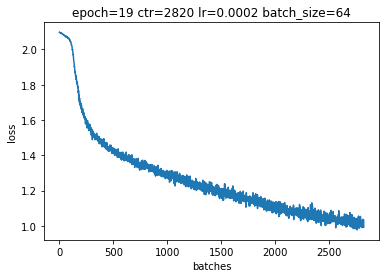

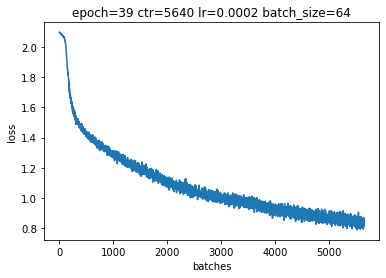

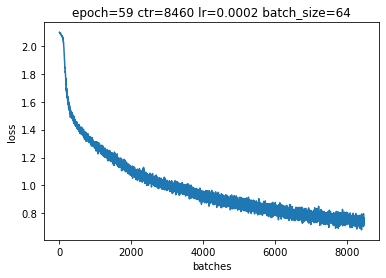

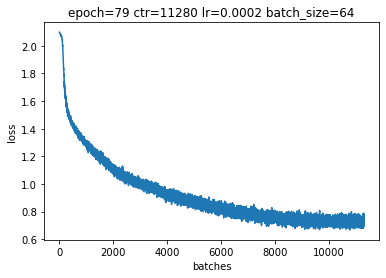

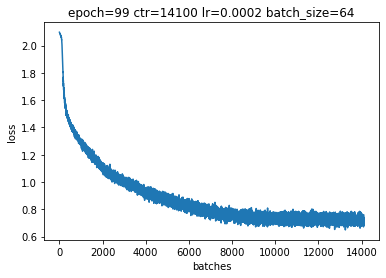

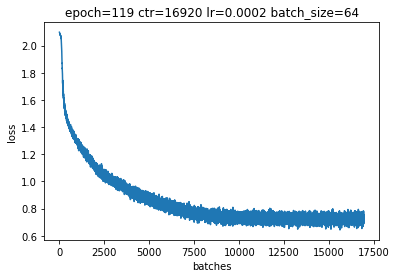

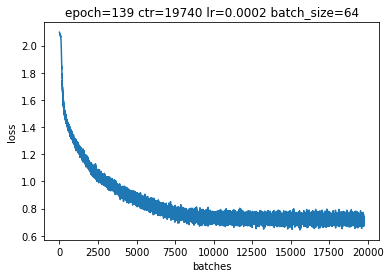

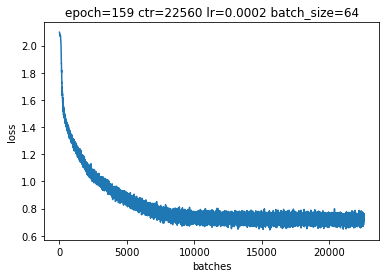

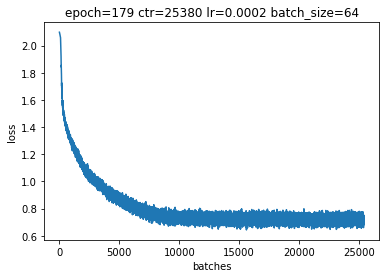

KeyboardInterrupt: 

In [6]:
train.train_net(rrn, train_X, train_y, lr=2e-4, batch_size=64, n_epochs=1000, device=device, show_step=2820)

In [7]:
torch.save(rrn.state_dict(), 'data/pt-cache/rrn_1.pt')